<a href="https://colab.research.google.com/github/Fabchirajoul/Transformer_MLM_AND_BINARY_CLASSIFICATION/blob/main/DistilRoberta.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# pip install accelerate -U

In [2]:
# pip install transformers

In [3]:
# pip install datasets

In [4]:
import random

# For our testing dataset

def random_sample_testing(input_file, output_file, sample_percentage=0.2):
    with open(input_file, 'r', encoding='utf-8') as file:
        lines = file.readlines()

    # Extract header and content separately
    header = lines[0]
    content = lines[1:]

    num_lines = len(content)
    sample_size = int(num_lines * sample_percentage)

    sampled_lines = random.sample(content, sample_size)

    # Add the "TEXT" header back at the beginning
    sampled_lines = [header] + sampled_lines

    with open(output_file, 'w', encoding='utf-8') as file:
        file.writelines(sampled_lines)

# Example usage
input_document = "/content/classification_dataset.csv"
output_sample = "/content/testing_dataset_classification.csv"
random_sample_testing(input_document, output_sample, sample_percentage=0.2)



# For our training dataset

def random_sample_testing(input_file, output_file, sample_percentage=0.7):
    with open(input_file, 'r', encoding='utf-8') as file:
        lines = file.readlines()

    # Extract header and content separately
    header = lines[0]
    content = lines[1:]

    num_lines = len(content)
    sample_size = int(num_lines * sample_percentage)

    sampled_lines = random.sample(content, sample_size)

    # Add the "TEXT" header back at the beginning
    sampled_lines = [header] + sampled_lines

    with open(output_file, 'w', encoding='utf-8') as file:
        file.writelines(sampled_lines)

# Example usage
input_document = "/content/classification_dataset.csv"
output_sample = "/content/training_dataset_classification.csv"
random_sample_testing(input_document, output_sample, sample_percentage=0.7)


# For our validation dataset


def random_sample_testing(input_file, output_file, sample_percentage=0.1):
    with open(input_file, 'r', encoding='utf-8') as file:
        lines = file.readlines()

    # Extract header and content separately
    header = lines[0]
    content = lines[1:]

    num_lines = len(content)
    sample_size = int(num_lines * sample_percentage)

    sampled_lines = random.sample(content, sample_size)

    # Add the "TEXT" header back at the beginning
    sampled_lines = [header] + sampled_lines

    with open(output_file, 'w', encoding='utf-8') as file:
        file.writelines(sampled_lines)

# Example usage
input_document = "/content/classification_dataset.csv"
output_sample = "/content/validation_dataset_classification.csv"
random_sample_testing(input_document, output_sample, sample_percentage=0.1)

In [5]:
from datasets import load_dataset
from transformers import AutoTokenizer, DataCollatorWithPadding

data_files = {"train": "/content/training_dataset_classification.csv",
              "validation": "/content/validation_dataset_classification.csv",
              "test": "/content/testing_dataset_classification.csv"
              }
df_DistilRoberta = load_dataset("csv", data_files=data_files)
df_DistilRoberta

Generating train split: 0 examples [00:00, ? examples/s]

Generating validation split: 0 examples [00:00, ? examples/s]

Generating test split: 0 examples [00:00, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 277
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 39
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 79
    })
})

In [6]:
# DistilRoberta

checkpoint = "distilroberta-base"
tokenizer = AutoTokenizer.from_pretrained(checkpoint)


def tokenize_function(example):
    return tokenizer(example["text"], truncation=True)


tokenized_datasets = df_DistilRoberta.map(tokenize_function, batched=True)
data_collator = DataCollatorWithPadding(tokenizer=tokenizer)

# # 2. distilroberta-base-climate-d-s
# checkpoint_d_s = "climatebert/distilroberta-base-climate-d-s"
# tokenizer_d_s = AutoTokenizer.from_pretrained(checkpoint_d_s)


# def tokenize_function_d_s(example):
#     return tokenizer_d_s(example["text"], truncation=True)


# tokenized_datasets_d_s = df_DistilRoberta.map(tokenize_function_d_s, batched=True)
# data_collator_d_s = DataCollatorWithPadding(tokenizer=tokenizer_d_s)


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Map:   0%|          | 0/277 [00:00<?, ? examples/s]

Map:   0%|          | 0/39 [00:00<?, ? examples/s]

Map:   0%|          | 0/79 [00:00<?, ? examples/s]

In [7]:
tokenized_datasets = tokenized_datasets.remove_columns(["text"])
tokenized_datasets = tokenized_datasets.rename_column("label", "labels")
tokenized_datasets.set_format("torch")
print("This is the tokenized dataset for DistilRoberta: \n\n", tokenized_datasets["train"].column_names)
print("=========================================================")

# # 2. distilroberta-base-climate-d-s

# tokenized_datasets_d_s = tokenized_datasets_d_s.remove_columns(["text"])
# tokenized_datasets_d_s = tokenized_datasets_d_s.rename_column("label", "labels")
# tokenized_datasets_d_s.set_format("torch")
# print("This is the tokenized dataset for ClimateBertds \n\n", tokenized_datasets_d_s["train"].column_names)


This is the tokenized dataset for DistilRoberta: 

 ['labels', 'input_ids', 'attention_mask']


In [8]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(
    tokenized_datasets["train"], shuffle=True, batch_size=8, collate_fn=data_collator
)
eval_dataloader = DataLoader(
    tokenized_datasets["validation"], batch_size=8, collate_fn=data_collator
)

In [9]:
for batch in train_dataloader:
    break
{k: v.shape for k, v in batch.items()}


You're using a RobertaTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


{'labels': torch.Size([8]),
 'input_ids': torch.Size([8, 259]),
 'attention_mask': torch.Size([8, 259])}

In [10]:
from transformers import AutoModelForSequenceClassification
from transformers import AutoModelForMaskedLM

model = AutoModelForSequenceClassification.from_pretrained(checkpoint, num_labels=2)

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at distilroberta-base and are newly initialized: ['classifier.out_proj.weight', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [11]:
# model_ClimateBert_D_S = AutoModelForMaskedLM.from_pretrained(checkpoint_d_s, num_labels=2)

In [12]:
print(model.config)

RobertaConfig {
  "_name_or_path": "distilroberta-base",
  "architectures": [
    "RobertaForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "bos_token_id": 0,
  "classifier_dropout": null,
  "eos_token_id": 2,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-05,
  "max_position_embeddings": 514,
  "model_type": "roberta",
  "num_attention_heads": 12,
  "num_hidden_layers": 6,
  "pad_token_id": 1,
  "position_embedding_type": "absolute",
  "transformers_version": "4.35.2",
  "type_vocab_size": 1,
  "use_cache": true,
  "vocab_size": 50265
}



In [14]:
outputs = model(**batch)
print(outputs.loss, outputs.logits.shape)

tensor(0.6712, grad_fn=<NllLossBackward0>) torch.Size([8, 2])


In [15]:
from transformers import AdamW

optimizer = AdamW(model.parameters(), lr=5e-5)

/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


In [17]:
from transformers import get_scheduler

num_epochs = 1
num_training_steps = num_epochs * len(train_dataloader)
lr_scheduler = get_scheduler(
    "linear",
    optimizer=optimizer,
    num_warmup_steps=0,
    num_training_steps=num_training_steps,
)
print(num_training_steps)

35
35


In [18]:
import torch

device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
model.to(device)
device

device(type='cpu')

In [19]:
from tqdm.auto import tqdm

progress_bar = tqdm(range(num_training_steps))

model.train()
for epoch in range(num_epochs):
    for batch in train_dataloader:
        batch = {k: v.to(device) for k, v in batch.items()}
        outputs = model(**batch)
        loss = outputs.loss
        loss.backward()

        optimizer.step()
        lr_scheduler.step()
        optimizer.zero_grad()
        progress_bar.update(1)

  0%|          | 0/35 [00:00<?, ?it/s]

In [20]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

# Set the model to evaluation mode
model.eval()

# Lists to store predictions and labels
all_predictions = []
all_labels = []

# Iterate through the evaluation dataloader
for batch in eval_dataloader:
    batch = {k: v.to(device) for k, v in batch.items()}
    with torch.no_grad():
        outputs = model(**batch)

    logits = outputs.logits
    predictions = torch.argmax(logits, dim=-1).cpu().numpy()
    labels = batch["labels"].cpu().numpy()

    all_predictions.extend(predictions.flatten())
    all_labels.extend(labels.flatten())

# Calculate accuracy
accuracy = accuracy_score(all_labels, all_predictions)

# Calculate precision, recall, F1 score, and support
precision, recall, f1_score, support = precision_recall_fscore_support(
    all_labels, all_predictions, average="weighted", zero_division=1
)

# Print the evaluation metrics
print(f"Accuracy: {accuracy:.3f}")
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1 Score: {f1_score:.3f}")
print(f"Support: {support}")

Accuracy: 0.949
Precision: 0.954
Recall: 0.949
F1 Score: 0.949
Support: None


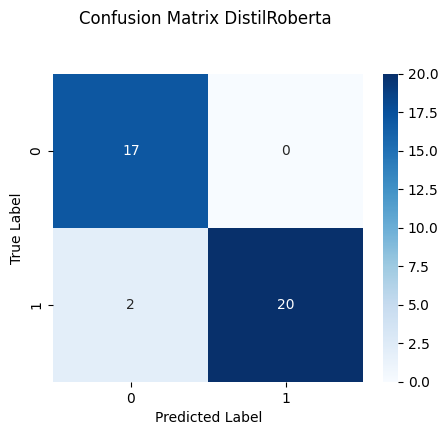

In [22]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate confusion matrix
conf_matrix_distilroberta = confusion_matrix(all_labels, all_predictions)

# Visualize the confusion matrix using seaborn heatmap
plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix_distilroberta, annot=True, fmt='d', cmap='Blues', xticklabels=True, yticklabels=True)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix DistilRoberta \n\n')
plt.show()